In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv('customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data = data[['Churn', 'tenure', 'SeniorCitizen', 'MonthlyCharges']]
data.head()

,Churn,tenure,SeniorCitizen,MonthlyCharges
0,No,1,0,29.85
1,No,34,0,56.95
2,Yes,2,0,53.85
3,No,45,0,42.30
4,Yes,2,0,70.70


In [4]:
data.isna().sum()

Churn             0
tenure            0
SeniorCitizen     0
MonthlyCharges    0
dtype: int64

In [5]:
#I'm going to see the differences between the amount of No and Yes
no_churn = data[data['Churn']=='No']
yes_churn = data[data['Churn']=='Yes']
display(no_churn.shape)
yes_churn.shape

(5174, 4)

(1869, 4)

In [6]:
#Let's start with X/Y split
X = data.drop('Churn',axis = 1)
y = data['Churn']

In [7]:
#I'm going to convert the target in a numerical variable
y = y.map({'Yes': 1, 'No': 0}).astype(int)

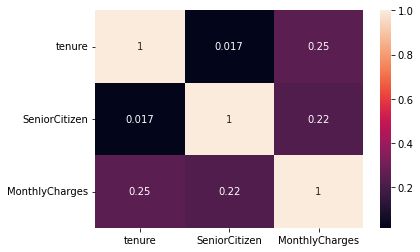

In [8]:
#I'll check correlations to see if I need to drop some columns
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [9]:
#First, I'm going to try the LM without scaling

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [11]:
LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train, y_train)
LR.score(X_test, y_test)

0.7825099375354913

In [12]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

pred = LR.predict(X_test)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.615606936416185
recall:  0.46004319654427644
f1:  0.526576019777503


In [13]:
confusion_matrix(y_test,pred)

array([[1165,  133],
       [ 250,  213]])

In [14]:
#No, I'll try the model scaling

In [15]:
#All columns are numericals
transformer = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X.columns)
X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)
X_train_scaled.head()

,tenure,SeniorCitizen,MonthlyCharges
0,-0.340191,-0.435476,-0.514314
1,0.883210,2.296336,0.017840
2,-1.196572,-0.435476,-0.819594
3,1.168670,-0.435476,-1.483535
4,-0.829552,-0.435476,0.658427


In [16]:
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True) 

In [17]:
LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)
LR.score(X_test_scaled, y_test)

0.7808063600227144

In [18]:
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.6115942028985507
recall:  0.4557235421166307
f1:  0.5222772277227723


In [19]:
confusion_matrix(y_test,pred)

array([[1164,  134],
       [ 252,  211]])

In [20]:
#As I can observe, there aren't any important differences between both
#but I'm not been able to detect more than the half of the customer churns


In [21]:
#Synthetic Minority Oversampling Technique (SMOTE)

In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
sm = SMOTE(random_state=100,k_neighbors=5)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [24]:
display(X_train.shape)
X_train_SMOTE.shape

(5282, 3)

(7752, 3)

In [25]:
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.4776978417266187
recall:  0.7170626349892009
f1:  0.5734024179620035


In [26]:
confusion_matrix(y_test,pred)

array([[935, 363],
       [131, 332]])

In [27]:
#The improvement is noticeable, using SMOTE I can predict almost a 30% more of the clients churns